In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [1]:
import os
os.environ['KAGGLE_USERNAME']='YOUR KAGGLE USERNAME'
os.environ['KAGGLE_KEY']='YOUR KAGGLE KEY'


In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [4]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic= []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))  

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  
  plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip =True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

In [18]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [19]:
train_generator.image_shape

(150, 150, 3)

In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)            

In [23]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 14s 735ms/step - loss: 4.4914 - accuracy: 0.5233 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 13s 696ms/step - loss: 0.6898 - accuracy: 0.5450 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 13s 706ms/step - loss: 0.6479 - accuracy: 0.6317 - val_loss: 0.6011 - val_accuracy: 0.8072
Epoch 4/30
19/19 [==============================] - 13s 697ms/step - loss: 0.5829 - accuracy: 0.7300 - val_loss: 0.5934 - val_accuracy: 0.8137
Epoch 5/30
19/19 [==============================] - 13s 704ms/step - loss: 0.4582 - accuracy: 0.8200 - val_loss: 0.4403 - val_accuracy: 0.8595
Epoch 6/30
19/19 [==============================] - 13s 705ms/step - loss: 0.3559 - accuracy: 0.8600 - val_loss: 0.4411 - val_accuracy: 0.8824
Epoch 7/30
19/19 [==============================] - 14s 713ms/step - loss: 0.3025 - accuracy: 0.8950 - val_loss: 0.3133 - val_accuracy: 0.9118

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'poch')

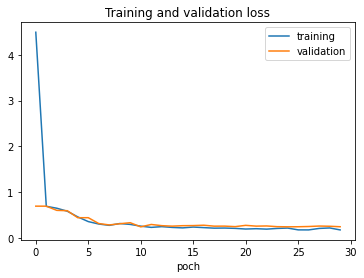

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('poch')


Text(0.5, 0, 'poch')

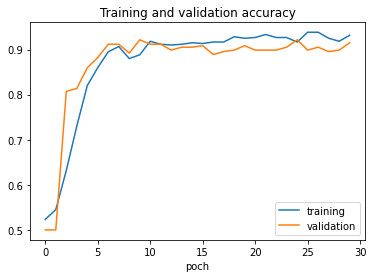

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('poch')

In [30]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 252ms/step - loss: 0.1928 - accuracy: 0.9100
test loss:0.19283905625343323 test acc:0.9100000262260437


In [33]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Mask')
  else:
    print('No Mask')  


Saving face.jpg to face (1).jpg
Saving mask.jpg to mask (1).jpg
face.jpg
No Mask
mask.jpg
Mask


In [34]:
model.save('model.h5')